#### symbolic pmf of $U$ based on $m$ given

In [13]:
%display latex
V = var('V')
phi = var('Phi')

# recursion algorithm to find the pmf of U
def computeU(m):
    U_mat = matrix(SR,m)
    U_mat[0,0] = 1
    
    for j in range(1,m):
        for k in range(j + 1): # if j = 1, k = 0 1
            if k < j:
                U_mat[j,k] = binomial(j,k) * (phi * V^(k+1))^(j-k) * U_mat[k,k]
            else: # k == j
                U_mat[j,j] = 1 - sum(U_mat[j,i] for i in range(j))
    
    return U_mat[-1,:]

#### realization for different $m$ and $p$

Note that we may use continued fraction to find a fraction approximation to a given decimal number. This usually gives us a smaller constant $a$ used later in substitution.

In [14]:
m = 4
a = 17
b = 65
p = a / b # should have coprime denom. and numer.
# p_cf = continued_fraction(0.3459) # for choosing the p with small denom
# p_cf.convergents()

In [15]:
# initialization
tp = p * (m - 1) / (m - (m + 1) * p)
hp = p / (1 - p)
rho = 1 - hp

phi = exp(-(1 - tp) / m) # as in frog star 2
V = exp(-rho * x / (m - 1))

U_vec = vector(computeU(m))

To have the best display of long math equations, right click the math below, then select math settings |> math renderer |> preview html.

In [16]:
f(x) = e^(-tp) * sum(e^((1 - hp * (1 + u)) * x) * U_vec[u] for u in range(m))
f(x).simplify_full()

(3*(e^(65/24*x) - e^(113/48*x))*e^(144/175) - 3*((e^(103/72*x) - 2*e^(175/144*x))*e^(17/24*x) - (e^(175/72*x) - 2*e^(67/36*x))*e^(5/12*x))*e^(113/175) + (3*(e^(31/144*x) - 2)*e^(41/24*x) - (e^(79/48*x) - 3*e^(175/144*x))*e^(17/24*x) - 3*((e^(31/144*x) - 2)*e^(79/48*x) + e^(319/144*x))*e^(5/12*x) + e^(41/12*x))*e^(82/175) + e^(3*x + 1))*e^(-41/12*x - 226/175)

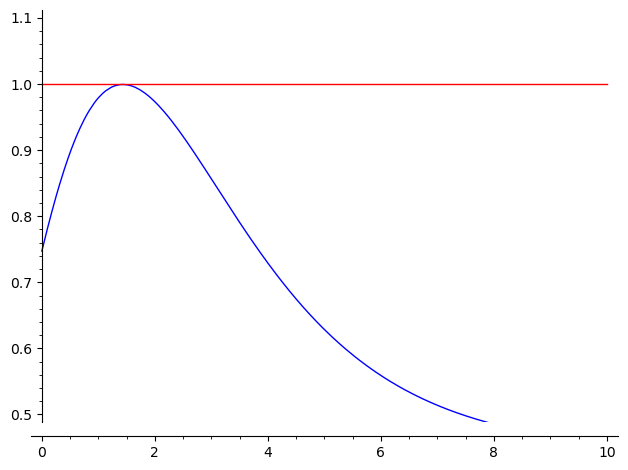

In [17]:
plot(f(x), (x,0,10), ymin = 0.5, ymax = 1.1) + plot(1, (x,0,10), ymin = 0.5, ymax = 1.1, color = 'red')

We substitute $x$ by $- (m-1)(b-a)\cdot\log(y)$ below. It suffices to let the substitution constant be the lcm of the denominators in the exponents instead, but that would not be general.

Since we are considering $x > 0$, it suffices to consider all $y \in (0,1)$.

In [18]:
c = (m - 1) * (b - a) # or manual input
g(y) = f(x).subs(x == -c * log(y))
c # sub constant

144

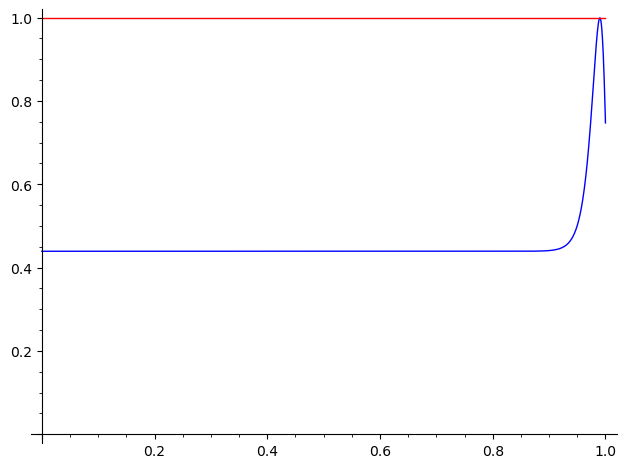

In [19]:
plot(g(y),(y,0,1), ymin = 0, ymax = 1) + plot(1, (y,0,1), ymin = 0, ymax = 1, color = 'red')

In [31]:
dg(y) = factor(diff(g(y)).simplify())
dg(y)

-3*(492*y^186 - 430*y^155*e^(31/175) - 430*y^155 - 390*y^135 + 184*y^124*e^(31/175) + 328*y^104*e^(31/175) + 164*y^104 + 153*y^93*e^(62/175) + 51*y^93 + 113*y^53 - 102*y^42*e^(62/175) - 82*y^22*e^(31/175) - 20*e^(93/175))*y^59*e^(-144/175)

In [21]:
mdg = mathematica(dg(y))
mdg.CountRoots([y,0,1]) # call CountRoots from Mathematica
# solve(dg(y) == 0, y, multiplicities = True) a possible alternative

60

There seems to be no `CountRoots` equivalent in SageMath. The `find_root` function gives *a* (not *the*) root of $g(y)$ within the closed interval given. It can run into precision problems if we choose some $a > 1000$, which makes $g'(y)$ have extremely large constants for computation. For example, see what `find_root` gives when we let $m = 7, p = 84 / 373,$ and $c = 1734 = 6 \times (373 - 84)$.

The idea is to use the `CountRoots` function from Mathematica, which hopefully helps us determine that for the function $g'(y)$, there are (1 + multiplicity of the root $y = 0$) on the closed interval $[0,1]$. (It is likely also that this function becomes unreliable for large $a$.) If that is the case, we know there is exactly one root of $g'(y)$ on $(0,1]$. Then by the steps below here in the code, we know that this root is indeed the global maximum, with $g(y_{\max}) < 1$.

In [22]:
y_max = dg(y).find_root(0.5,1)
y_max

0.9900915461380996

In [23]:
g(y_max).n() # < 1

0.999346739212881

In [24]:
x_max = -c * log(y_max) # original x_max
x_max

1.433933176622601

To check if this $y$ is indeed the global *maximum*, by the continuity of $g'$ we may do the following:

In [25]:
dg(y_max - 0.0001).n() # > 0

0.406142632259332

In [26]:
dg(y_max + 0.0001).n() # < 0

-0.410921878851331

To summarize,

In [27]:
print('Under m =', m, 'and p =', p, '~', float(p),'the substitution constant is', c,'\n\
g(y) reaches its maximum at y =', y_max, 'with value', g(y_max).n(), '< 1\n\
The original f(x) now reaches its maximum at x =', x_max)

Under m = 4 and p = 17/65 ~ 0.26153846153846155 the substitution constant is 144 
g(y) reaches its maximum at y = 0.9900915461380996 with value 0.999346739212881 < 1
The original f(x) now reaches its maximum at x = 1.433933176622601
